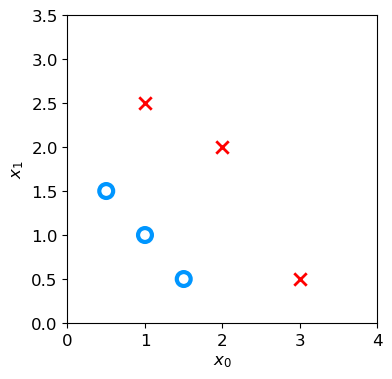

dj_db: 0.49861806546328574
dj_dw: [0.498333393278696, 0.49883942983996693]
Iteration    0: Cost 0.684610468560574   
Iteration 1000: Cost 0.1590977666870457   
Iteration 2000: Cost 0.08460064176930078   
Iteration 3000: Cost 0.05705327279402531   
Iteration 4000: Cost 0.04290759421682   
Iteration 5000: Cost 0.03433847729884557   
Iteration 6000: Cost 0.02860379802212006   
Iteration 7000: Cost 0.02450156960879306   
Iteration 8000: Cost 0.02142370332569295   
Iteration 9000: Cost 0.019030137124109114   

Final parameters: w:[5.28123029 5.07815608], b:-14.222409982019837


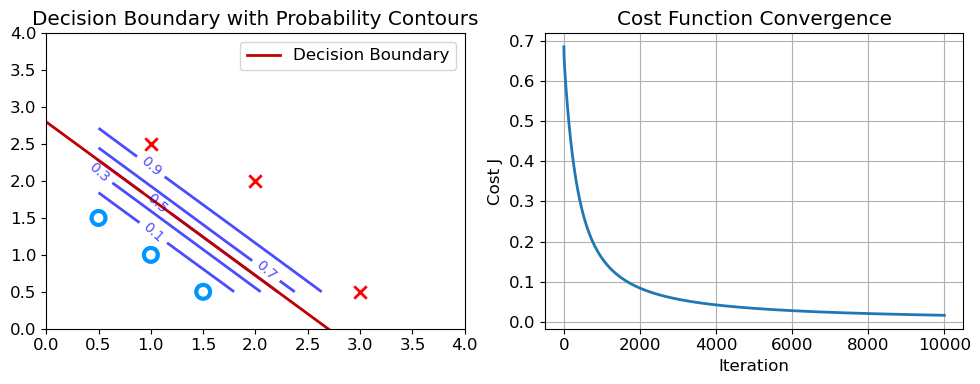

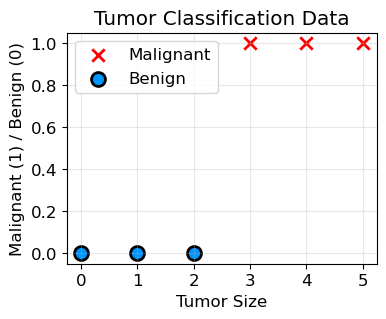

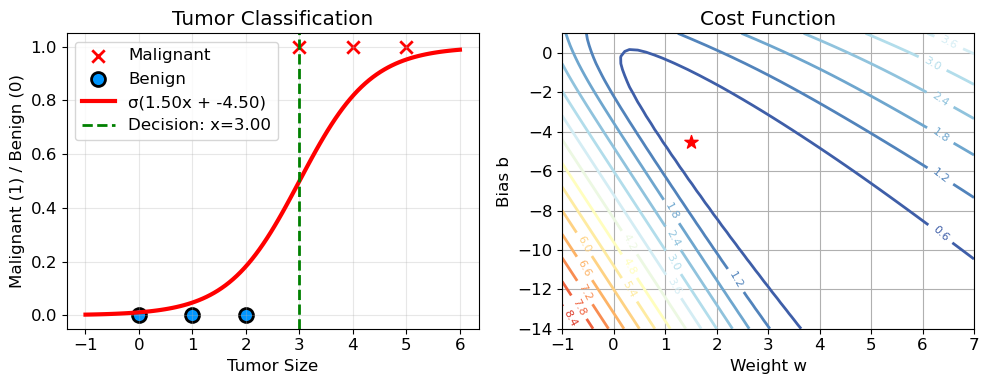

In [ ]:

import numpy as np
import copy
import math
import numpy as np
import matplotlib.pyplot as plt

# Define the missing functions locally
def plot_data(X, y, ax=None, title="", xlabel="", ylabel=""):
    """Plot 2D classification data"""
    if ax is None:
        fig, ax = plt.subplots()
    
    y = y.flatten() if len(y.shape) > 1 else y
    
    pos = y == 1
    neg = y == 0
    
    ax.scatter(X[pos, 0], X[pos, 1], marker='x', s=80, 
               c='red', label="y=1", linewidths=2)
    ax.scatter(X[neg, 0], X[neg, 1], marker='o', s=100, 
               label="y=0", facecolors='none', 
               edgecolors='#0096ff', linewidths=3)
    
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return ax

def sigmoid(z):
    """Sigmoid function"""
    return 1 / (1 + np.exp(-z))

def compute_cost_logistic(X, y, w, b):
    """
    Computes logistic regression cost
    """
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        cost += -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1-f_wb_i)
    return cost / m

# Color dictionary (dlc)
dlc = {
    'dlblue': '#0096ff',
    'dlorange': '#FF9300', 
    'dldarkred': '#C00000',
    'dlmagenta': '#FF40FF',
    'dlpurple': '#7030A0',
    'dlyellow': '#FFFF00',
    'dlgreen': '#00FF00'
}

def plt_prob(ax, w, b):
    """Plot the decision boundary and probability contours"""
    # Setup mesh grid
    x0 = np.arange(0.5, 4.5, 0.1)
    x1 = np.arange(0.5, 4.5, 0.1)
    X0, X1 = np.meshgrid(x0, x1)
    
    # Calculate probabilities
    z = w[0]*X0 + w[1]*X1 + b
    prob = 1/(1+np.exp(-z))
    
    # Create contour plot of probabilities
    CS = ax.contour(X0, X1, prob, levels=[0.1, 0.3, 0.5, 0.7, 0.9], 
                    colors='blue', alpha=0.7, linewidths=2)
    ax.clabel(CS, inline=1, fontsize=10)
    
    # Plot decision boundary (where probability = 0.5)
    boundary_x0 = np.array([0, 4])
    boundary_x1 = (-w[0]/w[1]) * boundary_x0 - b/w[1]
    ax.plot(boundary_x0, boundary_x1, c=dlc["dldarkred"], 
            linewidth=2, label="Decision Boundary")
    
    ax.set_xlim([0, 4])
    ax.set_ylim([0, 4])
    ax.set_xlabel('$x_0$', fontsize=12)
    ax.set_ylabel('$x_1$', fontsize=12)
    ax.legend()
    ax.set_title("Probability Contours and Decision Boundary")



In [ ]:
def plt_quad_logistic(X_train, y_train, w, b):
    """Create a 3D surface plot of the logistic regression cost/probability"""
    fig = plt.figure(figsize=(10, 8))
    
    # 1. 2D Plot with decision boundary
    ax = fig.add_subplot(1, 2, 1)
    plot_data(X_train, y_train, ax)
    
    # Plot decision boundary
    x0 = np.array([np.min(X_train[:,0]), np.max(X_train[:,0])])
    x1 = (-w[0]/w[1]) * x0 - b/w[1]
    ax.plot(x0, x1, c=dlc["dldarkred"], linewidth=3, 
            label=f"Decision Boundary")
    
    ax.set_xlabel('$x_0$', fontsize=12)
    ax.set_ylabel('$x_1$', fontsize=12)
    ax.legend()
    ax.set_title("Data with Decision Boundary")
    ax.axis('equal')
    
    # 2. 3D Probability Surface
    ax = fig.add_subplot(1, 2, 2, projection='3d')
    
    # Create mesh grid
    x0 = np.arange(0, 4.5, 0.1)
    x1 = np.arange(0, 4.5, 0.1)
    X0, X1 = np.meshgrid(x0, x1)
    
    # Calculate probabilities
    z = w[0]*X0 + w[1]*X1 + b
    prob = 1/(1+np.exp(-z))
    
    # Plot surface
    surf = ax.plot_surface(X0, X1, prob, cmap=cm.coolwarm,
                          alpha=0.8, linewidth=0, antialiased=True)
    
    # Plot training data points
    colors = ['red' if yi==1 else dlc['dlblue'] for yi in y_train]
    ax.scatter(X_train[:,0], X_train[:,1], y_train, 
               c=colors, s=100, depthshade=True, 
               edgecolors='black', linewidth=2)
    
    # Customize the z axis
    ax.set_zlim(-0.1, 1.1)
    ax.zaxis.set_major_locator(LinearLocator(10))
    
    ax.set_xlabel('$x_0$', fontsize=12)
    ax.set_ylabel('$x_1$', fontsize=12)
    ax.set_zlabel('Probability', fontsize=12)
    ax.set_title("Probability Surface")
    
    # Add a color bar which maps values to colors
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    
    plt.tight_layout()
    plt.show()
def plot_tumor_logistic_1d(X, y, w, b):
    """Plot 1D logistic regression for tumor data"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    
    # Left: Data with sigmoid fit
    plt_tumor_data(X, y, ax1)
    
    # Plot sigmoid curve
    x_plot = np.linspace(-1, 6, 100)
    z = w * x_plot + b
    prob = sigmoid(z)
    ax1.plot(x_plot, prob, 'r-', linewidth=3, 
             label=f'σ({w:.2f}x + {b:.2f})')
    
    # Add decision boundary
    threshold = -b/w if w != 0 else 0
    ax1.axvline(x=threshold, color='green', linestyle='--', 
                label=f'Decision: x={threshold:.2f}')
    ax1.legend()
    ax1.set_title("Tumor Classification")
    
    # Right: Cost surface
    w_vals = np.linspace(-1, 7, 50)
    b_vals = np.linspace(1, -14, 50)
    W, B = np.meshgrid(w_vals, b_vals)
    
    costs = np.zeros_like(W)
    for i in range(len(w_vals)):
        for j in range(len(b_vals)):
            cost = 0
            for k in range(len(X)):
                z_temp = W[j,i] * X[k] + B[j,i]
                f_wb = sigmoid(z_temp)
                cost += -y[k]*np.log(f_wb) - (1-y[k])*np.log(1-f_wb)
            costs[j,i] = cost/len(X)
    
    contour = ax2.contour(W, B, costs, levels=15, cmap='RdYlBu_r')
    ax2.clabel(contour, inline=1, fontsize=8)
    ax2.scatter(w, b, c='red', s=100, marker='*')
    ax2.set_xlabel('Weight w')
    ax2.set_ylabel('Bias b')
    ax2.set_title('Cost Function')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()
# Simple matplotlib style (instead of external file)
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

fig,ax = plt.subplots(1,1,figsize=(4,4))
plot_data(X_train, y_train, ax)

ax.axis([0, 4, 0, 3.5])
ax.set_ylabel('$x_1$', fontsize=12)
ax.set_xlabel('$x_0$', fontsize=12)
plt.show()

def compute_gradient_logistic(X, y, w, b): 
    """
    Computes the gradient for logistic regression 
 
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    """
    m,n = X.shape
    dj_dw = np.zeros((n,))                           #(n,)
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)          #(n,)(n,)=scalar
        err_i  = f_wb_i  - y[i]                       #scalar
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * X[i,j]      #scalar
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m                                   #(n,)
    dj_db = dj_db/m                                   #scalar
        
    return dj_db, dj_dw  
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.
dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp.tolist()}" )

def gradient_descent(X, y, w_in, b_in, alpha, num_iters):  
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)   

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               
        b = b - alpha * dj_db               
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( compute_cost_logistic(X, y, w, b) )

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}   ")
    return w, b, J_history         #return final w,b and J history for graphing

w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

# Run gradient descent
w_out, b_out, J_history = gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters) 
print(f"\nFinal parameters: w:{w_out}, b:{b_out}")

# Plot 1: Decision boundary with probability contours
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Left: Probability contours
plt_prob(ax1, w_out, b_out)
plot_data(X_train, y_train, ax1)
ax1.set_title("Decision Boundary with Probability Contours")

# Right: Cost function convergence
ax2.plot(J_history)
ax2.set_xlabel("Iteration")
ax2.set_ylabel("Cost J")
ax2.set_title("Cost Function Convergence")
ax2.grid(True)

plt.tight_layout()
plt.show()

x_train = np.array([0., 1, 2, 3, 4, 5])
y_train = np.array([0,  0, 0, 1, 1, 1])

fig,ax = plt.subplots(1,1,figsize=(4,3))
plt_tumor_data(x_train, y_train, ax)
plt.show()

w_example = 1.5
b_example = -4.5
plot_tumor_logistic_1d(x_train, y_train, w_example, b_example)